In [1]:
import glob
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_res():
    res = {}
    
    # Gets the folders Simulation_Agent_XXXXX one by one
    for f in glob.glob('outputs/*/Simulation_Agent_*', recursive=True):
        # Gets the name of the agent, eg NoiseTrader
        _name = f.split('_')[2]
        
        # Gets the run name, Multirun-....
        #_run = f.split('/')[1]
        
        #if _run not in res:
        #    res[_run] = {}

        # Get the file name to pass into read_parquet
        #file = glob.glob('outputs/*/Simulation_Agent_{}/*.parquet'.format(_name))[0]
        #df = pd.read_parquet(file, engine='pyarrow')
        
        file = glob.glob('outputs/*/Simulation_Agent_{}/*.csv'.format(_name))[0]
        df = pd.read_csv(file)
        
        if (_name == 'Exchange'):
            print(file)
            
        #res[_run][_name] = df
        res[_name] = df

    return res

    
    #runids = res.keys()
   # dataset = np.unique([list(res[k].keys()) for k in res])

    #return res, np.sort(list(runids)), dataset


In [70]:
def plotAllFields(field):
    sns.color_palette('pastel')
    plt.figure(figsize=(10,4), tight_layout=True)
    
    #res, _, _ = get_res()
    res = get_res()
    #singleRun = res[run]
    singleRun = res
    for trader in singleRun:
        df = singleRun[trader]            
        # Only look at trader types which contain the desired field
        if (field in df.columns): 
            # Get the average values of the field for each trader type
            ticks, fields = averageValues(df[['tick']], df[[field]], df['tick'].max(0))
            plt.plot(ticks, fields, label = trader, linewidth=1)
    plt.title('Graph of {} vs time'.format(field))
    plt.xlabel('Tick')
    plt.ylabel(field)
    
    plt.minorticks_on()
    plt.grid()
    plt.grid(which='minor', linewidth = '0.2')
    plt.legend()
    plt.show()
        
        
def averageValues(ticks, fields, numberOfTicks):
    ticks_average = np.arange(0, numberOfTicks, 1)
    fields_average = []
    agent_numbers = round(len(fields) / (numberOfTicks + 1))
    for i in range(numberOfTicks):
        indices = np.arange(i * agent_numbers, (i+1) * agent_numbers, 1)
        fields_average.append(fields.iloc[indices].sum() / agent_numbers)
    return ticks_average, fields_average
    
def printAverageOverTicks(start, end, field, traders):
    #r,_,_ = get_res()
    #singleRun = r[run]
    singleRun = get_res()
    result = 0
    for trader in traders:
        df = singleRun[trader]
        if (field in df.columns):
            ticks, fields = averageValues(df[['tick']], df[[field]], df['tick'].max(0))
            s = slice(start, end, 1)
            result += sum(fields[s]) / (end - start)
    result /= len(traders)
    print(result)


In [29]:
printAverageOverTicks(0, 250, 'price', ['Exchange'])

outputs/Multirun-68e6f4c4-8a62-4ce8-ab00-0f50df8730d9/Simulation_Agent_Exchange/run000000000.csv
price    18.457604
dtype: float64


outputs/Multirun-36af1bdd-8fc3-48ac-bd02-9567198b147d/Simulation_Agent_Exchange/run000000000.csv


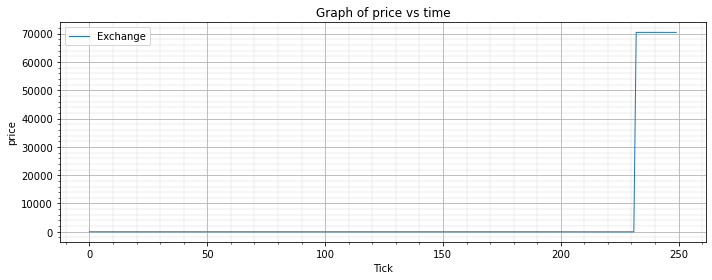

In [71]:
plotAllFields('price')

outputs/Multirun-36af1bdd-8fc3-48ac-bd02-9567198b147d/Simulation_Agent_Exchange/run000000000.csv


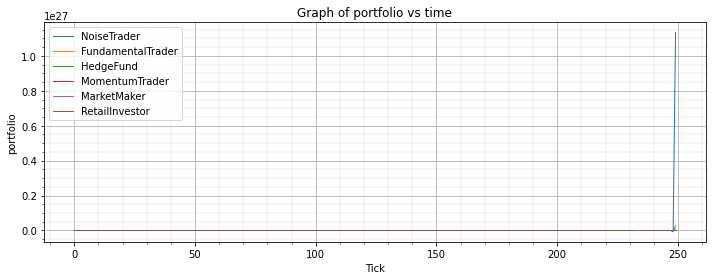

In [72]:
plotAllFields('portfolio')

outputs/Multirun-36af1bdd-8fc3-48ac-bd02-9567198b147d/Simulation_Agent_Exchange/run000000000.csv


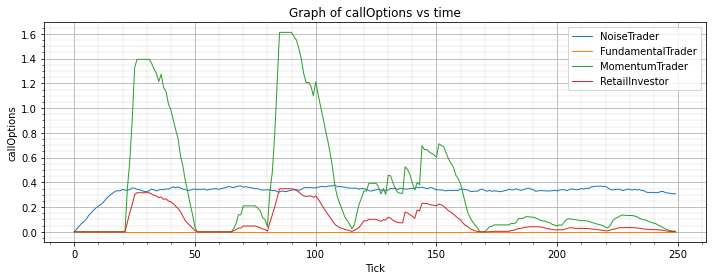

In [73]:
plotAllFields('callOptions')

outputs/Multirun-36af1bdd-8fc3-48ac-bd02-9567198b147d/Simulation_Agent_Exchange/run000000000.csv


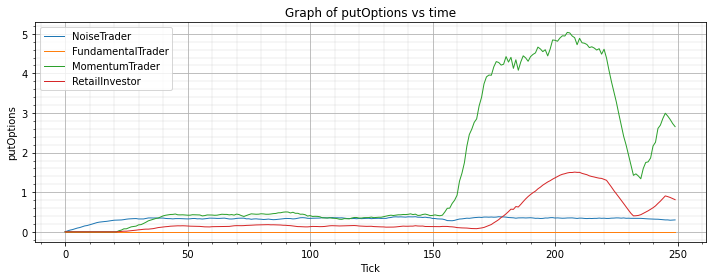

In [74]:
plotAllFields('putOptions')

outputs/Multirun-36af1bdd-8fc3-48ac-bd02-9567198b147d/Simulation_Agent_Exchange/run000000000.csv


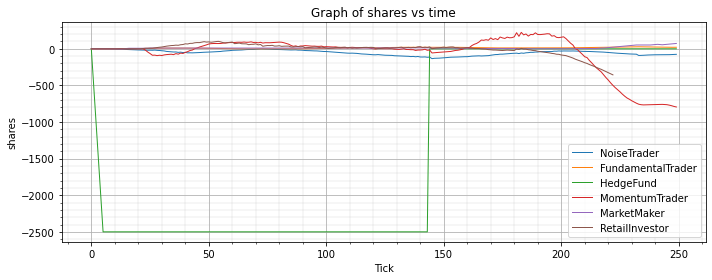

In [75]:
plotAllFields('shares')

outputs/Multirun-36af1bdd-8fc3-48ac-bd02-9567198b147d/Simulation_Agent_Exchange/run000000000.csv


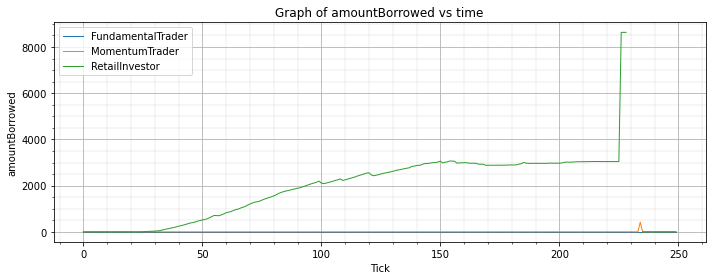

In [76]:
plotAllFields('amountBorrowed')

outputs/Multirun-36af1bdd-8fc3-48ac-bd02-9567198b147d/Simulation_Agent_Exchange/run000000000.csv


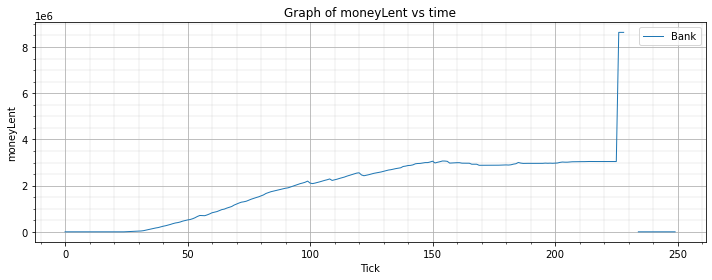

In [77]:
plotAllFields('moneyLent')

outputs/Multirun-c840bbb1-f5d4-40e8-b88f-286c5fcb5b11/Simulation_Agent_Exchange/run000000000.csv


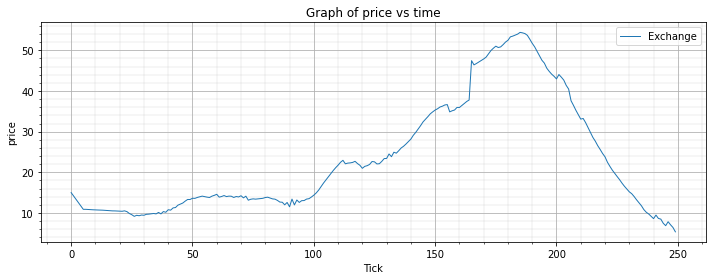

In [41]:
plotAllFields('price')

outputs/Multirun-c840bbb1-f5d4-40e8-b88f-286c5fcb5b11/Simulation_Agent_Exchange/run000000000.csv


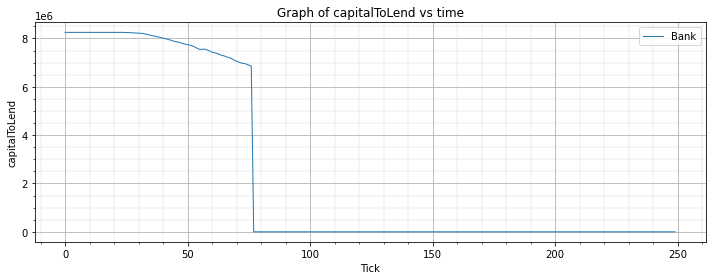

In [46]:
plotAllFields('capitalToLend')

outputs/Multirun-36af1bdd-8fc3-48ac-bd02-9567198b147d/Simulation_Agent_Exchange/run000000000.csv


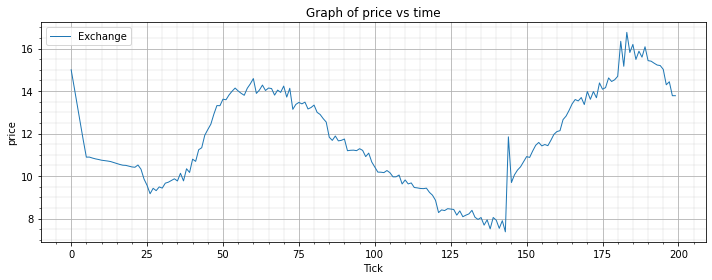

In [60]:
plotAllFields('price')

outputs/Multirun-36af1bdd-8fc3-48ac-bd02-9567198b147d/Simulation_Agent_Exchange/run000000000.csv


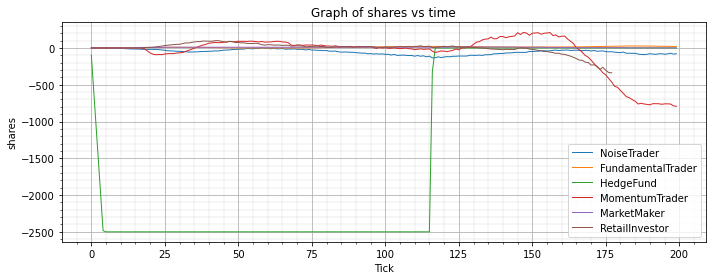

In [62]:
plotAllFields('shares')